In [518]:
#%matplotlib notebook
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(16,8))
rc('font',size=12)
rc('text',usetex=False)

from qubicpack import qubicpack as qp
import fibtools as ft
import plotters as p
import lin_lib as ll
import demodulation_lib as dl

from pysimulators import FitsArray

import numpy as np
from matplotlib.pyplot import *
import matplotlib.mlab as mlab
import scipy.ndimage.filters as f
import glob
import string
import scipy.signal as scsig
from scipy import interpolate

In [575]:
#### Data from 13-15 March
# dirfiles = '/Users/hamilton/Qubic/Calib-TD/ScanData_2019-03-26_PPS/'
# names = 'ScanMap_testPPS'
#### Data from 28-29 March
# dirfiles = '/Users/hamilton/Qubic/Calib-TD/ScanData_2019-03-29/'
# names = 'ScanMap_Speed_VE4_El'
#### Data from 30-31 March
# dirfiles = '/Users/hamilton/Qubic/Calib-TD/ScanData_2019-03-31/'
# names = 'ScanMap_Speed_VE4_El'
#### Data from 30-31 March with pps times
# dirfiles = '/Users/hamilton/Qubic/Calib-TD/ScanData_2019-03-31_newPPS/'
# names = 'ScanMap_Speed_VE4_El'
#### Data from 30-31 March with pps times
# dirfiles = '/Users/hamilton/Qubic/Calib-TD/ScanData_2019-03-31_newPPS_200/'
# names = 'ScanMap_Speed_VE4_El'
#### Data from 30-31 March with pps times and proper demodulation
dirfiles = '/Volumes/Data/Qubic/Calib-TD/ScanData_2019-03-31_DemodSrc/'
names = 'ScanMap_Speed_VE4_El'


allfiles = np.sort(glob.glob(dirfiles+'alltes*_'+names+'_*.fits'))
allfiles = np.sort(allfiles)

allels = np.zeros(len(allfiles))
for i in xrange(len(allfiles)):
    allels[i] = str.split(allfiles[i],'_')[-1][:-5]
allangs = FitsArray(dirfiles+'az_ang_'+names+'.fits')
print(allels)
print allangs
print len(allangs)
print(allangs/np.cos(np.radians(50)))

[30.24 30.49 30.74 30.99 31.25 31.5  31.75 32.   32.25 32.5  32.76 33.01
 33.26 33.51 33.76 34.01 34.26 34.51 34.77 35.01 35.25 35.5  35.75 36.
 36.26 36.51 36.76 37.01 37.26 37.51 37.77 38.02 38.27 38.52 38.77 39.02
 39.28 39.52 39.78 40.03 40.28 40.53 40.78 41.03 41.27 41.52 41.78 42.02
 42.28 42.52 42.78 43.03 43.28 43.53 43.79 44.04 44.29 44.54 44.79 45.05
 45.29 45.55 45.79 46.04 46.29 46.54 46.79 47.03 47.28 47.53 47.78 48.03
 48.29 48.54 48.79 49.04 49.29 49.54 49.79 50.04 50.3  50.54 50.8  51.05
 51.3  51.55 51.8  52.05 52.3  52.55 52.8  53.04 53.29 53.54 53.79 54.04
 54.3  54.55 54.8  55.05 55.3  55.55 55.81 56.06 56.31 56.56 56.81 57.06
 57.31 57.56 57.81 58.06 58.31 58.56 58.8  59.05 59.29 59.55 59.8  60.05
 60.3  60.55 60.81 61.06 61.31 61.56 61.81 62.06 62.31 62.56 62.82 63.07
 63.32 63.57 63.82 64.07 64.32 64.57 64.8  65.06 65.3  65.56 65.81 66.06
 66.31 66.56 66.81 67.07 67.31 67.57 67.82 68.07 68.32 68.57 68.83 69.07
 69.32 69.58 69.82]
[-1.61429892e+01 -1.59905710e+01 

In [576]:
data = np.array(FitsArray(allfiles[0]))
sh = np.shape(data)
print sh

(256, 233)


In [577]:
alldata = np.zeros((len(allels), sh[0], sh[1]))
for j in xrange(len(allfiles)):
    data = np.array(FitsArray(allfiles[j]))
    alldata[j,:,:] = (data.T-np.median(data,axis=1)).T


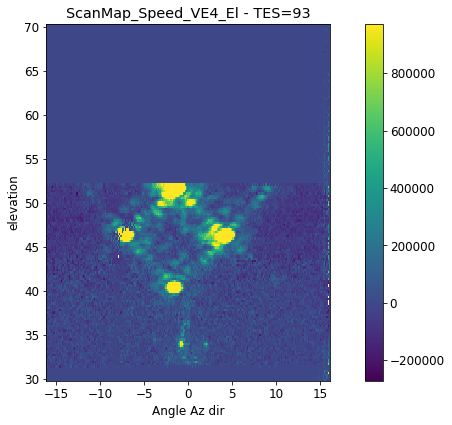

In [578]:
### Nice 61, 93!!!, 106, 184, 186, 191

rc('figure',figsize=(10,6))
TESNum = 93
img = np.flip(alldata[:,TESNum-1,:], axis=1)
med = np.median(img)
img -= med
mm, ss = ft.meancut(img, 10)
ns = 10
imshow(img, extent=[np.min(allangs),np.max(allangs), np.min(allels)-0.5, np.max(allels)+0.5], 
       vmin=mm-3*ss, vmax=mm+ns*ss, cmap='viridis', origin='lower', aspect='equal')
xlabel('Angle Az dir')
ylabel('elevation')
colorbar()
title(names+' - TES='+str(TESNum))
tight_layout()

In [537]:
rc('figure',figsize=(10,14))
nn1 = 4
nn2 = 4
ic=0
serie = 0

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('result_flat_'+names+'.pdf') as pdf:
    for serie in xrange(256/(nn1*nn2)+1):
        for i in xrange(nn1*nn2):
            TESNum = serie*nn1*nn2+i+1
            if ((TESNum/32)*32)==TESNum: print TESNum
            if TESNum <= 256:
                subplot(nn1,nn2,i+1)
                img = alldata[:,TESNum-1,:]
                med = np.median(img)
                img -= med
                mm, ss = ft.meancut(img, 10)
                ns = 10
                #imshow(img)
                imshow(img, extent=[np.min(allangs),np.max(allangs), 
                                    np.min(allels), np.max(allels)], vmin=mm-4*ss, vmax=mm+ns*ss, 
                       cmap='viridis', aspect='equal', origin='lower')
                xlabel('Angle Az. dir')
                ylabel('elevation')
                #colorbar()
                title('TES='+str(TESNum))
        tight_layout()        
        pdf.savefig()
    close()


32
64
96
128
160
192
224
256


# Now try to put this into a healpix map

5.6763101168542445


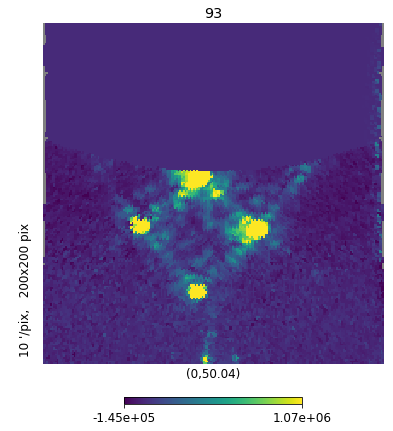

In [565]:
import healpy as hp
nside = 220
TESNum = 93

def scan2hpmap(ns, ang_azdeg, eldeg, data):
    coadd = np.zeros(12*ns**2)
    count = np.zeros(12*ns**2)
    for i in xrange(len(ang_azdeg)):
        for j in xrange(len(eldeg)):
            azdeg = ang_azdeg[i]/np.cos(np.radians(eldeg[j]))
            ip = hp.ang2pix(ns, np.pi/2-np.radians(eldeg[j]), np.radians(azdeg))
            coadd[ip] += data[j,i]
            count[ip] += 1
    ok = count != 0
    sbmap = np.zeros(12*ns**2)
    sbmap[ok] = coadd[ok]/count[ok]
    sbmap[~ok] = hp.UNSEEN
    return sbmap

sbmap = scan2hpmap(nside, allangs, allels, alldata[:,TESNum-1,:])
mm, ss = ft.meancut(sbmap[sbmap != hp.UNSEEN], 4)
#print allels
#print allaz
hp.gnomview(sbmap, rot=[0,np.mean(allels)], reso=10,min=mm-4*ss, max=mm+ss*30,title=TESNum)
print(np.max(sbmap-mm)/(ss*30))

In [538]:
rc('figure',figsize=(10,14))
nn1 = 4
nn2 = 4
ic=0
serie = 0

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('result'+names+'.pdf') as pdf:
    for serie in xrange(256/(nn1*nn2)+1):
        print serie, 256/(nn1*nn2)+1
        for i in xrange(nn1*nn2):
            TESNum = serie*nn1*nn2+i+1
            if TESNum <= 256:
                sbmap = scan2hpmap(nside, allaz, allels, alldata[:,TESNum-1,:])
                mm, ss = ft.meancut(sbmap[sbmap != hp.UNSEEN], 4)
                hp.gnomview(sbmap, rot=[0,np.mean(allels)], title='TES='+str(TESNum),
                            reso=12,min=0, max=ss*15, sub=(nn1, nn2,i+1))
        pdf.savefig()
        close()
        tight_layout()


0 17
1 17
2 17
3 17
4 17
5 17
6 17
7 17
8 17
9 17
10 17
11 17
12 17
13 17
14 17
15 17
16 17


<Figure size 1000x1400 with 0 Axes>

In [395]:
print 'result'+names+'.pdf'

resultScanMap_Speed_VE4_El.pdf
